## Housing Assessment Regressivity

In the domain of property tax, assessment regressivity is defined as the systematic over-assessment of less expensive properties and under-assessment of more expensive properties, relative to their respective sale prices. We refer to assessment regressivity as housing assessment regressivity (HAR) to distinguish it from other forms of regressivity in statistics.

We claim that an ordinary least squares (OLS) model that predicts house value from characteristics about the house (e.g. square footage) inherently produces the HAR phenomenon. 

The remainder of this article builds geometric intuition for how OLS generates this form of inequity through the 1-dimensional case of simple linear regression.

## Simple Linear Regression

We have a set of training data $(x_1, y_1) ... (x_N, y_N)$, or $\vec x = [x_1 ... x_N]$ and $\vec y =[y_1 ... y_N]$, which we standardize to produce $\vec x =  \frac{\vec x - \mu_x}{\sigma_x}$. 

We fit the linear model $\hat{y}_i = \beta*x_i$ with $\vec y$ and the standardized $\vec x$ by minimizing $RSS(\beta) = \sum_{i=1}^{N}{(y_i - \hat{y}_i)^2}$

Further, assume that $y_i = \beta*x_i + \epsilon_i$ where $\epsilon_i$ ~ $N(0, \sigma_\epsilon)$ is i.i.d. and independent of x_i. While not a requirement for OLS to cause HAS, assume for this example that $x_i$ ~ $N(0, 1)$. Let "data ellipse" refer to an isocontour of the probability density of the joint distribution over $x_i$ and $y_i$. 

Because ordinary least squares minimizes the squared sum of residuals $e_i = y_i - \hat{y}_i$, the regression line approximates $\mathbb{E}[Y | X]$. This means that in this example, the regression line bisects the vertical chords of the data ellipse.

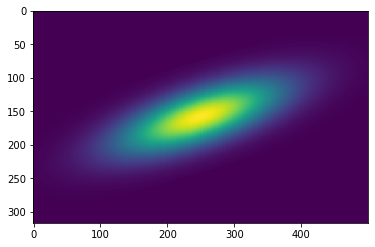

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
from scipy.stats import norm

N = 10000

x = np.random.normal(loc=0, scale=1, size=N)
epsilon = np.random.normal(loc=0, scale=1, size=N)
y = x + epsilon

num_x_bins = 500
x_domain = np.linspace(-3, 3, num_x_bins)
x_densities = norm.pdf(x_domain, loc=0, scale=1)

sigma_epsilon = 1 # 0.5 / 3
num_epsilon_bins = int(num_x_bins/(6/(2*sigma_epsilon)))
epsilon_domain = np.linspace(0 - 3*sigma_epsilon, 0 + 3*sigma_epsilon, num_epsilon_bins)
epsilon_densities = norm.pdf(epsilon_domain, loc=0, scale=sigma_epsilon)

beta = .3
joint_density = np.zeros([num_epsilon_bins + int(num_x_bins*beta+1), num_x_bins])

for j in range(joint_density.shape[1]):
    joint_density[int(j*beta+1):int(j*beta+1)+num_epsilon_bins, j] = x_densities[j] * epsilon_densities
joint_density = np.flipud(joint_density)

plt.imshow(joint_density)
plt.show();

# Todo: Change axes to reflect the x and y values, not the matrix indices
# Todo: Scatter a dataset generated via this distribution and the OLS line over this plot

## Housing Assessment Regressivity from OLS

Todo: Explain how HAR is not present if the horizontal chords are bisected

In [54]:
# Todo: Plot to visualize the horizontal chords not being bisected by the OLS line
# Todo: Visualization with an interactive 1D regression line and a display of the covariance between y_hat and the residual 

## Implications
Todo: Disclaimer that OLS is not necessarily the only driving factor of housing assessment regressivity. However, current work has not revealed all causes of housing assessment regressivity; this is an important direction to pursue

The next blog post of this series will delve into derivations showing how OLS leads to HAR.